# MTH5001 Introduction to Computer Programming - Lecture 5
Module organisers Dr Lucas Lacasa and Prof. Thomas Prellberg

## Logic

Last week, we discussed functions and how to use these to repeat operations efficiently for different input values.

Up to now, our Python code has consisted out of a list of instructions that were executed sequentially one after another. However, in programming it is usually necessary to decide upon different instructions. (You can also be certain that these skills will be required of you for your project.)

You are familiar with this from the definition of piecewise defined mathematical functions. To define a function that takes a real number $x$ and returns $1$ if $x$ is in the open interval $(0,1)$ and $0$ otherwise, we would write
$$f(x)=\begin{cases}1&\text{for $x\in(0,1)$,}\\0&\text{otherwise.}\end{cases}$$

This can be written in Python as follows.

In [1]:
def f(x):
    if 0<x and x<1:
        return 1
    else:
        return 0

There is quite a bit of new code here that I haven't explained yet (regardless, it should be somewhat readable). For now, lets just confirm that this works by using the function to compute a few values, and then by plotting the graph of the function we have just written.

In [2]:
print(f(-1),f(1/2),f(3.14))

0 1 0


In [3]:
from matplotlib import pyplot as plt
x=[-3+n/100 for n in range(601)] # remember that we can define the x values via np.linspace, a list, or a range
y=[f(t) for t in x] # remember also that t is just a placeholder, [f(poo) for poo in x] would work equally well
plt.plot(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

So what's new in the code above? There are (a) comparison operators (`<`), (b) logical operators (`and`), and finally (c) an [if statement](http://docs.python.org/3/tutorial/controlflow.html#if-statements) controlling the "flow" of the program execution. We shall now examine these new items in turn.

### Boolean Values

Implicit in the use of comparison and logical operators is the use of [Boolean](http://en.wikipedia.org/wiki/George_Boole) types, which can take the values `True` and `False`. We can assign Boolean values to variables as we have done with other data types.

In [4]:
you_are_smart=True
print(you_are_smart)
type(you_are_smart)

True


bool

### Comparison Operators

The above comparison `0<x` gives as output a Boolean variable, if `x` is of type int or float.

In [5]:
print(0<1)
print(1<0)
print(2<2)

True
False
False


More generally, comparison operators "compare" two objects and return a Boolean value. There are eight comparison operations in Python:

|Operation|Meaning|
|---|---|
|`<`|strictly less than|
|`<=`|less than or equal to|
|`>`|strictly greater than|
|`>=`|greater than or equal to|
|`==`|equal|
|`!=`|not equal|
|`is`|object identity|
|`is not`|negated object identity|

For numerical comparisons it is sufficient to focus on the first six of these. (Object identity is related to how data is stored in Python. More about this later.)

In [6]:
print(0<=0)
print(0>0)
print(0>=0)
print(0==0)
print(0!=0)
print(0==1)
print(0!=1)

True
False
True
True
False
False
True


**One common mistake beginning programmers make is to confuse '=' (assignment) with '==' (equality comparison): while `a==2` tests whether `a` has the value 2, `a=2` assigns the value 2 to `a`.**

### Boolean Operators

Boolean Operators `and`, `or`, and `not` can be used to combine Boolean values, giving results just as you would expect from logic statements in mathematics.

In [7]:
print(True and False)
print(True or False)
print(not True)

False
True
False


Python implements these operators as follows:

|Operation|Meaning|
|---|---|
|`x or y`|if x is false, then y, else x|
|`x and y`|if x is false, then x, else y|
|`not x`|if x is false, then `True`, else `False`|

This is important to note, as for example when executing `x or y` Python does not evaluate `y` if `x` is true.

--- 

As an aside, note that other data can be evaluated as Boolean values in comparisons. This can lead to confusion unless you are really able to clearly think through the logic. But some lazy programmers love to use it, so I need to mention the following.

Generally zero values or empty collections of elements are `False` (e.g. `0`, `0.0`, `0j`, `''`, `()`, `[]`, `range(0)`), non-zero values or non-empty collections are `True`. For example, `not 0` is `True`, as `0` evaluates to `False`. For example, when computing `not 5`, Python evaluates `5` to be `True`, and hence `not 5` is `False`.

In [8]:
print(not 5)

False


Note that by this convention, `0` is evaluated as `False`, but `[0]` is evaluated as `True`, which is a bit confusing. Best avoid it.

In [9]:
print(not 0)
print(not [0])

True
False


Finally, it gets even more confusing when we ask Python to compute `4 and 5`. Both `4` and `5` evaluate to `True`, so logically `4 and 5` should return `True`. Instead we get the following:

In [10]:
print(4 and 5)

5


So what is going on? Looking at the table above, we see that Python evaluates `4` to be `True`, so it returns the second argument `5`, just as described above. The Boolean value of `5` is `True`, so this actually makes sense. If in doubt, it's best to entirely avoid this and restrict yourself to doing logical comparisons **only with Boolean data**. However, you might encounter code where some programmer uses this feature, so it's good to be aware of it.

---

### Combining Boolean Operations and Comparisons

Logical expressions can be formed in Python and behave just as you would expect from Mathematics.

In [11]:
1<2 and 4==4

True

In [12]:
1<2 and 3<=1

False

In [13]:
not 0>1

True

---

As another aside, Python allows us to chain inequalities together. You are used from Mathematics to write $0<x<1$, which for $x=1/2$ is a true statement. Logically, you have combined $0<x$ and $x<1$ in one statement. Python allows you to do just the same.

In [14]:
x=1/2
print(0<x<1)
print(0<x and x<1)

True
True


However, Python allows you to also write things that you would avoid when writing mathematics, such as $0<3>2$. Python simply interprets `0<3>2` as `0<3 and 3>2`, which is true.

In [15]:
print(0<3>2)
print(0<3 and 3>2)

True
True


You will see code like this, but it is best if you **avoid chain inequalities** and use `and` instead.

---

### Operator Precedence revisited

Knowing the order of operator precedence is important when writing code. If you are unsure, you can always add brackets, but too many brackets can make your code hard to read. For example, due to operator precedence, the following two expressions are equivalent.

In [16]:
print(1<2 and not 3<2)
print((1<2) and (not (3<2)))

True
True


Here is part of a [table](http://docs.python.org/3/reference/expressions.html#operator-precedence) of some operators we have encountered so far **ordered by decreasing precedence**.

|Operator|Description|
|---|---|
|`or`|	Boolean OR|
|`and`|	Boolean AND|
|`not x`|	Boolean NOT|
|`<`, `<=`, `>`, `>=`, `!=`, `==`|	Comparisons|
|`+`, `-`|	Addition and subtraction|
|`*`, `/`, `//`, `%` |	Multiplication, division, floor division, remainder|
|`+x`, `-x`	|Positive, negative|
|`**`	| Exponentiation|
|`x[index]`, `x[index:index]`, `x(arguments...)`	|Subscription, slicing, call|
|`(expressions...)`, `[expressions...]`|	Binding or tuple display, list display|

The entries further down in this table get evaluated first. In the example below, you therefore cannot remove all bracketing, as the `not` negates `(1<2 and 3<2)`. In the last line, the `not` only negates `1<2`.

In [17]:
print(not ((1<2) and (3<2)))
print(not (1<2 and 3<2))
print(not 1<2 and 3<2)

True
True
False


### If Statement

Having discussed logical statements, we now return to the function we had defined above and discuss the [if statement](http://docs.python.org/3/tutorial/controlflow.html#if-statements). An if statement consists out of one or more blocks of code such that only one block is executed depending on the value of logical expressions.

In [18]:
def f(x):
    if 0<x and x<1: # note that we could equivalently have written: if 0<x<1
        return 1
    else:
        return 0

In the above example, If `0<x<1` is `True`, then the function executes the first block (it returns `1`), otherwise it executes the second block (it returns `0`).

Lets look at a more complex example, where we determine the type of the roots of a quadratic polynomial by considering its discriminant.

In [19]:
# Determine if the roots of polynomial ax^2 + bx + c = 0 are real, repeated or complex
# this is determined by the sign of the discriminant b^2-4ac
a = 10
b = -234
c = 1984

def discriminant(a,b,c):
    return b**2 - 4*a*c

print("Discriminant =", discriminant(a,b,c))

if discriminant(a,b,c) > 0:
    print("Roots are real and distinct.")
elif discriminant(a,b,c) < 0:
    print("Roots are complex.")
else:
    print("Roots are real and repeated.")

Discriminant = -24604
Roots are complex.


Python checks the conditions of the `if` statement sequentially: If the discriminant is positive then the first block is executed. Otherwise, if the discriminant is negative then the second block is executed. Otherwise, the third block is executed.

The main points to observe when writing an `if` statement are as follows:

1. Start with the `if` keyword.
2. Write a logical expression (returning `True` or `False`).
3. End line with a colon `:`.
4. Indent block 4 spaces after `if` statement.
5. Include `elif` (one or more) and `else` statements if needed.
6. Only ***one*** of the blocks following `if`, `elif` and `else` is executed.
7. The block following an `else` statement will execute only if all other logical expressions before it are `False`.

***Remember that jupyter notebook helps you with indentation: if you hit enter after typing a colon `:`, it automatically indents the following line!***

Let us finish by considering a slightly more complicated example of a piecewise defined function.
$$g(x)=\begin{cases}1+x&\text{for $x<-1$,}\\\sqrt{-x(1+x)}&\text{for $-1\le x<0$,}\\-\sqrt{x(1-x)}&\text{for $0\le x<1$,}\\x-1&\text{for $1\le x$.}\end{cases}$$

The Python code for this function is as follows:

In [20]:
def g(x):
    if x<-1:   #       x < -1
        y=x+1
    elif x<0:  # -1 <= x <  0
        y=(-x*(1+x))**(1/2)
    elif x<1:  #  0 <= x <  1
        y=-(x*(1-x))**(1/2)
    else:      #  1 <= x
        y=x-1
    return y

Having written the Python code, we can now produce the graph.

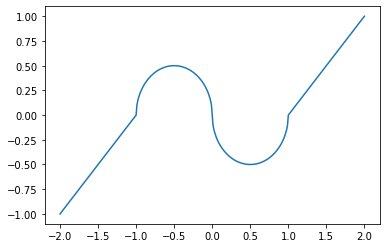

In [21]:
from matplotlib import pyplot as plt
x=[-2+n/100 for n in range(401)]
y=[g(t) for t in x]
plt.plot(x,y)
plt.show()

## Recursive functions

Many functions in mathematics are easily defined by recursion. For example, take the factorial function $n!$ which is the product over all positive integers less than or equal to $n$. Multiplying $(n-1)!$ by the factor $n$ gives you $n!$, so one equivalent definition is as follows:
$$n!=\begin{cases}1&n=0,\\ n\cdot(n-1)!&n>0.\end{cases}$$

This what is known as a recursive definition, as the value of $n!$ depends on $(n-1)!$ for any $n>0$. It turns out that recursive definitions of functions can be very easily implemented in Python.

In [22]:
def fac(n):
    "Factorial function, assuming non-negative integer input"
    if n==0:
        f=1
    else:
        f=n*fac(n-1)
    return f

In [23]:
[fac(n) for n in range(10)]

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

While this looks simple, there is actually more going on than you might initially realise. In particular, what makes this work is the fact that `n` and `f` are local variables. Lets use `print()` statements to show what happens.This is useful for testing purposes, once the code is tested we would normally remove these `print()` statements again.

In [24]:
def fac(n):
    print('fac called with', n)
    if n==0:
        f=1
    else:
        f=n*fac(n-1)
    print('fac returns ', n, '!= ', f, sep='')
    return f

In [25]:
fac(5)

fac called with 5
fac called with 4
fac called with 3
fac called with 2
fac called with 1
fac called with 0
fac returns 0!= 1
fac returns 1!= 1
fac returns 2!= 2
fac returns 3!= 6
fac returns 4!= 24
fac returns 5!= 120


120

If $n$ is greater than one, the factorial function needs to compute $n\cdot(n-1)!$ for which the value of $(n-1)!$ is needed. So to get $5!$, it needs to compute $4!$, for which it needs $3!$, which in turn requires $2!$, for which $1!$ is needed, which is needs $0!$. Finally $0!=1$, and everything can be put together.

### Binomial coefficients and Pascal's triangle

Binomial coefficients have an explicit expression in terms of factorials as follows
$$\binom nk=\frac{n!}{k!(n-k)!}\quad\text{for $n\geq0$ and $0\leq k\leq n$.}$$ 
They can be visualised Pascal's triangle, where $n$ is the number of the row and $k$ the position in the row (starting with zero as in Python indexing).




One clearly gets entries in a row by adding neighbouring entries in the row above, for example $10=4+6$. Mathematically, we can therefore write

$$\binom n0=\binom nn=1\quad\text{for $n\geq0$}$$
and
$$\binom nk=\binom{n-1}{k-1}+\binom{n-1}k\quad\text{for $n>0$ and $0<k<n$.}$$

Lets write the Python code.

In [26]:
def binomial(n,k):
    "binomial coefficient, assuming two integer parameters n and k with n>=0 and 0<=k<=n"
    if k==0 or k==n:
        b=1
    else:
        b=binomial(n-1,k-1)+binomial(n-1,k)
    return b

This should give us the above triangle.

In [27]:
[[binomial(n,k) for k in range (n+1)] for n in range(8)]

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1]]

## The danger of infinite recursion

Note that the above functions did not test for nonsense input. If I tried to compute `fac(0.5)`, for example, the function would try to compute $(-1/2)!$, then $(-3/2)!$, then $(-5/2)!$ and so on, ad infinitum. Lets try it.

In [28]:
fac(0.5)

fac called with 0.5
fac called with -0.5
fac called with -1.5
fac called with -2.5
fac called with -3.5
fac called with -4.5
fac called with -5.5
fac called with -6.5
fac called with -7.5
fac called with -8.5
fac called with -9.5
fac called with -10.5
fac called with -11.5
fac called with -12.5
fac called with -13.5
fac called with -14.5
fac called with -15.5
fac called with -16.5
fac called with -17.5
fac called with -18.5
fac called with -19.5
fac called with -20.5
fac called with -21.5
fac called with -22.5
fac called with -23.5
fac called with -24.5
fac called with -25.5
fac called with -26.5
fac called with -27.5
fac called with -28.5
fac called with -29.5
fac called with -30.5
fac called with -31.5
fac called with -32.5
fac called with -33.5
fac called with -34.5
fac called with -35.5
fac called with -36.5
fac called with -37.5
fac called with -38.5
fac called with -39.5
fac called with -40.5
fac called with -41.5
fac called with -42.5
fac called with -43.5
fac called with -44.5


fac called with -618.5
fac called with -619.5
fac called with -620.5
fac called with -621.5
fac called with -622.5
fac called with -623.5
fac called with -624.5
fac called with -625.5
fac called with -626.5
fac called with -627.5
fac called with -628.5
fac called with -629.5
fac called with -630.5
fac called with -631.5
fac called with -632.5
fac called with -633.5
fac called with -634.5
fac called with -635.5
fac called with -636.5
fac called with -637.5
fac called with -638.5
fac called with -639.5
fac called with -640.5
fac called with -641.5
fac called with -642.5
fac called with -643.5
fac called with -644.5
fac called with -645.5
fac called with -646.5
fac called with -647.5
fac called with -648.5
fac called with -649.5
fac called with -650.5
fac called with -651.5
fac called with -652.5
fac called with -653.5
fac called with -654.5
fac called with -655.5
fac called with -656.5
fac called with -657.5
fac called with -658.5
fac called with -659.5
fac called with -660.5
fac called 

fac called with -1118.5
fac called with -1119.5
fac called with -1120.5
fac called with -1121.5
fac called with -1122.5
fac called with -1123.5
fac called with -1124.5
fac called with -1125.5
fac called with -1126.5
fac called with -1127.5
fac called with -1128.5
fac called with -1129.5
fac called with -1130.5
fac called with -1131.5
fac called with -1132.5
fac called with -1133.5
fac called with -1134.5
fac called with -1135.5
fac called with -1136.5
fac called with -1137.5
fac called with -1138.5
fac called with -1139.5
fac called with -1140.5
fac called with -1141.5
fac called with -1142.5
fac called with -1143.5
fac called with -1144.5
fac called with -1145.5
fac called with -1146.5
fac called with -1147.5
fac called with -1148.5
fac called with -1149.5
fac called with -1150.5
fac called with -1151.5
fac called with -1152.5
fac called with -1153.5
fac called with -1154.5
fac called with -1155.5
fac called with -1156.5
fac called with -1157.5
fac called with -1158.5
fac called with 

fac called with -1617.5
fac called with -1618.5
fac called with -1619.5
fac called with -1620.5
fac called with -1621.5
fac called with -1622.5
fac called with -1623.5
fac called with -1624.5
fac called with -1625.5
fac called with -1626.5
fac called with -1627.5
fac called with -1628.5
fac called with -1629.5
fac called with -1630.5
fac called with -1631.5
fac called with -1632.5
fac called with -1633.5
fac called with -1634.5
fac called with -1635.5
fac called with -1636.5
fac called with -1637.5
fac called with -1638.5
fac called with -1639.5
fac called with -1640.5
fac called with -1641.5
fac called with -1642.5
fac called with -1643.5
fac called with -1644.5
fac called with -1645.5
fac called with -1646.5
fac called with -1647.5
fac called with -1648.5
fac called with -1649.5
fac called with -1650.5
fac called with -1651.5
fac called with -1652.5
fac called with -1653.5
fac called with -1654.5
fac called with -1655.5
fac called with -1656.5
fac called with -1657.5
fac called with 

fac called with -2117.5
fac called with -2118.5
fac called with -2119.5
fac called with -2120.5
fac called with -2121.5
fac called with -2122.5
fac called with -2123.5
fac called with -2124.5
fac called with -2125.5
fac called with -2126.5
fac called with -2127.5
fac called with -2128.5
fac called with -2129.5
fac called with -2130.5
fac called with -2131.5
fac called with -2132.5
fac called with -2133.5
fac called with -2134.5
fac called with -2135.5
fac called with -2136.5
fac called with -2137.5
fac called with -2138.5
fac called with -2139.5
fac called with -2140.5
fac called with -2141.5
fac called with -2142.5
fac called with -2143.5
fac called with -2144.5
fac called with -2145.5
fac called with -2146.5
fac called with -2147.5
fac called with -2148.5
fac called with -2149.5
fac called with -2150.5
fac called with -2151.5
fac called with -2152.5
fac called with -2153.5
fac called with -2154.5
fac called with -2155.5
fac called with -2156.5
fac called with -2157.5
fac called with 

fac called with -2617.5
fac called with -2618.5
fac called with -2619.5
fac called with -2620.5
fac called with -2621.5
fac called with -2622.5
fac called with -2623.5
fac called with -2624.5
fac called with -2625.5
fac called with -2626.5
fac called with -2627.5
fac called with -2628.5
fac called with -2629.5
fac called with -2630.5
fac called with -2631.5
fac called with -2632.5
fac called with -2633.5
fac called with -2634.5
fac called with -2635.5
fac called with -2636.5
fac called with -2637.5
fac called with -2638.5
fac called with -2639.5
fac called with -2640.5
fac called with -2641.5
fac called with -2642.5
fac called with -2643.5
fac called with -2644.5
fac called with -2645.5
fac called with -2646.5
fac called with -2647.5
fac called with -2648.5
fac called with -2649.5
fac called with -2650.5
fac called with -2651.5
fac called with -2652.5
fac called with -2653.5
fac called with -2654.5
fac called with -2655.5
fac called with -2656.5
fac called with -2657.5
fac called with 

RecursionError: maximum recursion depth exceeded while calling a Python object

Fortunately Python stops this nonsense after too many recursions. Otherwise the code box would just show 
`In [*]:` and you would have to stop the program execution by hand (by selecting "interrupt the kernel" from the menu).

## Conclusion and Outlook

In this lecture we have introduced logic and an if statement as a first example of program control flow. Next week we will encounter more control flow statements.